# 5. Random forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import FeatureImportances

plt.style.use("default")

In [2]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r label_encoder
%store -r classes
%store -r feature_names

Let's start with a grid search on the random forest classifier :

In [3]:
rf = Pipeline([
    ("forest",RandomForestClassifier())
])

In [4]:
grid = {
    "forest__n_estimators": [1,5,10,20,50,100,200],
    "forest__max_depth": [1,3,5,10,50,None]
}

In [5]:
rfcv = GridSearchCV(rf,grid,cv=5,return_train_score=True)

In [6]:
rfcv.fit(X_train,y_train);

In [7]:
print("The best parameters are \n")
for i,j in rfcv.best_params_.items():
    print(f"- {i} : {j}")
print("\nWith a test accuracy of {:.2f}%".format(100*rfcv.best_score_))

The best parameters are 

- forest__max_depth : 10
- forest__n_estimators : 200

With a test accuracy of 69.73%


In [8]:
fine_grid = {
    "forest__n_estimators": [50,80,100,150,300],
    "forest__max_depth": [50,100,None]
}

In [9]:
rfcv_fine = GridSearchCV(rf,fine_grid,cv=5,return_train_score=True)

In [10]:
rfcv_fine.fit(X_train,y_train);

In [11]:
print("The best parameters are \n")
for i,j in rfcv_fine.best_params_.items():
    print(f"- {i} : {j}")
print("\nWith a test accuracy of {:.2f}%".format(100*rfcv_fine.best_score_))

The best parameters are 

- forest__max_depth : 100
- forest__n_estimators : 300

With a test accuracy of 70.40%


Let's see the feature importance of our random forest classifier

In [12]:
rf_tuned = RandomForestClassifier(n_estimators=rfcv_fine.best_params_["forest__n_estimators"],
                                  max_depth=rfcv_fine.best_params_["forest__max_depth"])

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


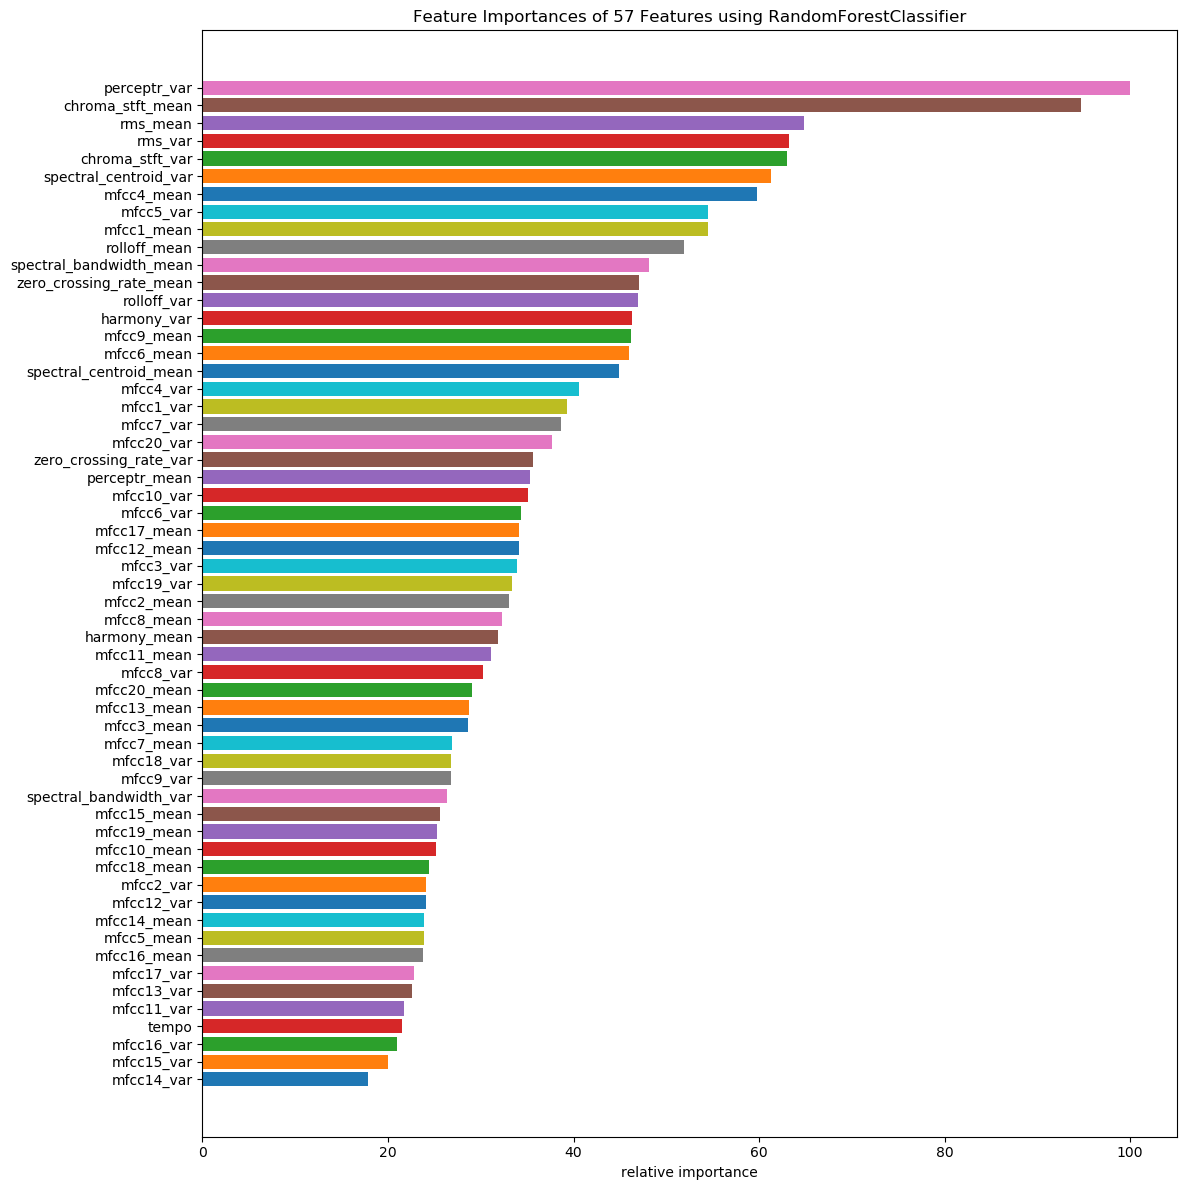

In [13]:
plt.figure(figsize=(12,12))
fi = FeatureImportances(rf_tuned,labels=feature_names)
fi.fit(X_train,y_train)
fi.show();

We can see that chroma features and perceptrual variance are the most important features for the random forest as well as the 4th mfcc, however, most mfcc are not as important as the other features. Tempo too is not an important feature to describe a song here.

Lets do a confusion matrix for this classifier :

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


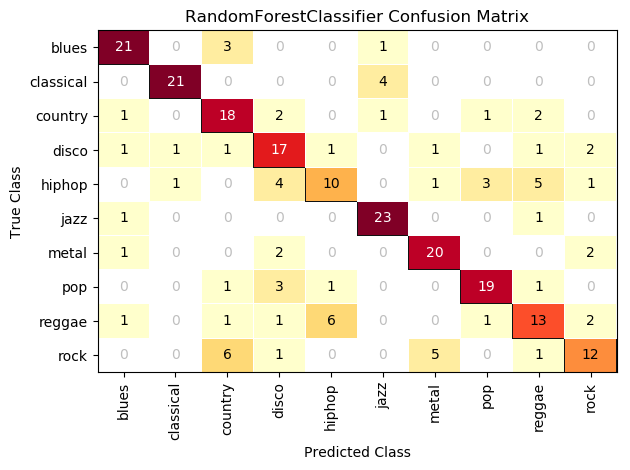

In [14]:
cm_rf= ConfusionMatrix(rf_tuned,classes=classes,label_encoder=label_encoder)
cm_rf.fit(X_train,y_train)
cm_rf.score(X_test,y_test)
cm_rf.show();

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


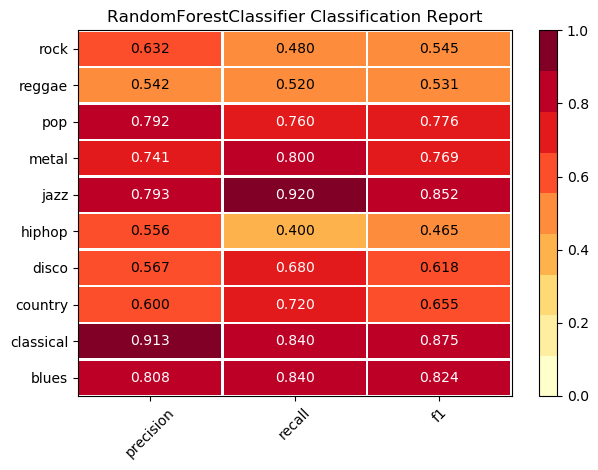

In [15]:
report = ClassificationReport(rf_tuned,encoder=label_encoder)
report.fit(X_train,y_train)
report.score(X_test,y_test)
report.show();

We see that rock still has a hard time getting well classified, however, blues, jazz, classical and metal have good results, this is maybe due to the importance of perceptrual feature which expresses rythm and emotions. Still, the overall results are worse than the kernel svm results.